# Fitting `UniLasso` for specified regularization path

In [1]:
from unilasso import *

## Linear Regression Example

Let's first simulate some data using the included simulation script provided by the package.

Then we fit UniLasso for specified regularization path, `0.01, 0.02, 0.1, 0.2` (ordering does not matter).

In [2]:
X, y = simulate_gaussian_data(n=1000, p=100)
gaussian_fit = fit_unilasso(X, 
                            y, 
                            family = 'gaussian',
                            lmdas = [0.01, 0.02, 0.1, 0.2] # Regularization parameters for Lasso
                            )

 75%|          | 0/4 [00:00:00<?, ?it/s]███████   | 3/4 [00:00:00<00:00:00, 1878.91it/s] [dev:94.1%]


We should print out the regularization path to see for which parameters the `UniLasso` model was run.

In [3]:
print(gaussian_fit.lmdas)

[0.01 0.02 0.1 ]


Now, we can extract the returned coefficients and intercepts and print their shapes.

In [4]:
coef, intercept = gaussian_fit.coef, gaussian_fit.intercept

print(coef.shape)
print(intercept.shape)

(3, 100)
(3,)


`coef[0, :]` correpsonds to the coefficients for $\lambda = 0.02$.

In [5]:
coef[0, ]

array([ 0.        ,  0.64517425,  0.24763923,  0.11980934,  0.02511094,
        0.9252998 ,  0.92927416, -0.42106476, -0.95426349, -0.        ,
       -0.7079709 , -0.94140706,  0.        , -0.        , -0.        ,
       -0.86999738,  1.07971112,  0.        ,  0.59667934, -0.        ,
       -0.53472791,  0.4671035 , -0.5007077 , -0.01318105, -0.42635577,
        0.48696643, -0.85215635,  0.39177325, -0.60745113, -0.56576366,
        1.07417768, -0.64021586, -0.42054226, -0.74488953, -1.02084535,
        0.27253834, -0.67319139,  0.82615115,  0.65788569,  1.08202935,
        0.65185678, -0.25936277, -0.30073546,  0.99072818, -0.55946036,
       -0.        ,  0.        ,  0.8189087 ,  0.        , -0.        ,
        0.        ,  0.        , -0.93842582,  0.85933497, -0.        ,
       -0.58922277,  1.03780681,  0.12086537,  1.00933905,  0.39634973,
        0.89569495,  0.36121884, -0.        , -0.82507806, -0.95377402,
        0.72192057, -0.58999044,  0.0639217 , -1.10929861,  0.  

### Predict on new data

To get predictions, we call `predict`:

In [6]:
y_hat = predict(X, gaussian_fit)
print(y_hat.shape)

(1000, 3)


We can also call `predict` for a specific index of $\lambda$:

In [7]:
y_hat_lmda_1 = predict(X, gaussian_fit, lmda_idx = 1)
print(y_hat_lmda_1.shape)

(1000,)


### One regularization parameter

We can also input only one regularization parameter:

In [8]:
gaussian_fit_one_lmda = fit_unilasso(X, y, family = 'gaussian', lmdas = 0.2, verbose = True)

100%|          | 0/1 [00:00:00<?, ?it/s]██████████| 1/1 [00:00:00<00:00:00, 1090.76it/s] [dev:68.9%]██████████| 1/1 [00:00:00<00:00:00, 280.78it/s] [dev:68.9%] 


Number of Selected Features: 53
Regularization path (rounded to 3 decimal places): [0.2]


## Logistic Regression Example

Now we run an example logistic regression model using `UniLasso`. We set `verbose = True` to print out some summary information of the model.

In [9]:
X, y = simulate_binomial_data(n=1000, p=10)

binomial_fit = fit_unilasso(X,
                            y,
                            family = 'binomial',
                            lmdas = [0.01, 0.02, 0.1, 0.2], # Regularization parameters for Lasso
                            verbose = True
                            )

100%|          | 0/4 [00:00:00<?, ?it/s]██████████| 4/4 [00:00:00<00:00:00, 2873.39it/s] [dev:25.4%]██████████| 4/4 [00:00:00<00:00:00, 549.39it/s] [dev:25.4%] 


Number of Selected Features: [6 6 0 0]
Regularization path (rounded to 3 decimal places): [0.01 0.02 0.1  0.2 ]


In [10]:
binomial_fit.lmdas

array([0.01, 0.02, 0.1 , 0.2 ])

## Survival Analysis Example

In [11]:
X, y = simulate_cox_data(n=1000, p=10)

cox_fit = fit_unilasso(X,
                       y,
                       family = 'cox',
                       lmdas = [0.01, 0.02, 0.1, 0.2], # Regularization parameters for Lasso
                       verbose = True
                       )

100%|          | 0/4 [00:00:00<?, ?it/s]██████████| 4/4 [00:00:00<00:00:00, 2251.67it/s] [dev:13.2%]██████████| 4/4 [00:00:00<00:00:00, 1043.40it/s] [dev:13.2%]


Number of Selected Features: [9 8 2 0]
Regularization path (rounded to 3 decimal places): [0.01 0.02 0.1  0.2 ]


# Cross-validated `UniLasso`

If we don't have a prespecified list of regularization path or regularization parameter, we can perform cross-validation to select a penalization parameter for us. We again begin by simulating some Gaussian data.

In [12]:
X, y = simulate_gaussian_data(n=1000, p=10)

In [13]:
cv_fit = cv_unilasso(X,
                     y,
                     family = 'gaussian',
                     verbose = True
                     )

100%|          | 0/100 [00:00:00<?, ?it/s]██████████| 100/100 [00:00:00<00:00:00, 56697.38it/s] [dev:75.4%]██████████| 100/100 [00:00:00<00:00:00, 24405.87it/s] [dev:75.4%]


Number of Selected Features: [ 0  1  1  1  2  2  3  4  4  4  4  4  5  5  5  5  5  5  5  5  6  7  8  8
  8  8  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10]
Regularization path (rounded to 3 decimal places): [1.018e+00 9.060e-01 8.070e-01 7.180e-01 6.390e-01 5.690e-01 5.070e-01
 4.510e-01 4.010e-01 3.570e-01 3.180e-01 2.830e-01 2.520e-01 2.240e-01
 2.000e-01 1.780e-01 1.580e-01 1.410e-01 1.250e-01 1.120e-01 9.900e-02
 8.900e-02 7.900e-02 7.000e-02 6.200e-02 5.600e-02 4.900e-02 4.400e-02
 3.900e-02 3.500e-02 3.100e-02 2.800e-02 2.500e-02 2.200e-02 2.000e-02
 1.700e-02 1.500e-02 1.400e-02 1.200e-02 1.100e-02 1.000e-02 9.000e-03
 8.000e-03 7.000e-03 6.000e-03 5.000e-03 5.000e-03 4.000e-03 4.000e-03
 3.000e-03 3.000e-03 3.000e-03 2.000e-03 2.000e-03 2.000e-03 2.000e-03
 2.000e-03 1.000e-03 1.000e-03 1.000e-03 1.000

Now, we can extract the best $\lambda$.

In [14]:
best_lmda = cv_fit.best_lmda
print(best_lmda)

1.0177948743760662e-05


We can also extract the coefficients and intercept corresponding to the best model as follows:

In [20]:
best_coef, best_intercept = extract_cv_unilasso(cv_fit)

print("Best coefficients and intercepts:")
print('\n-------------------\n')
print(best_coef)
print('\n-------------------\n')
print(best_intercept)

Best coefficients and intercepts:

-------------------

[-0.28223896  0.19819552  0.46797904 -0.67367243 -0.25874964 -0.2473679
 -0.99268673  0.15659642 -0.69177337  0.80878362]

-------------------

-0.02164414618091881


Let's visualize the average CV loss.

(<Figure size 900x600 with 1 Axes>,
 <Axes: title={'center': 'K-Fold CV Mean Loss'}, xlabel='$-\\log(\\lambda)$', ylabel='Mean Loss'>)

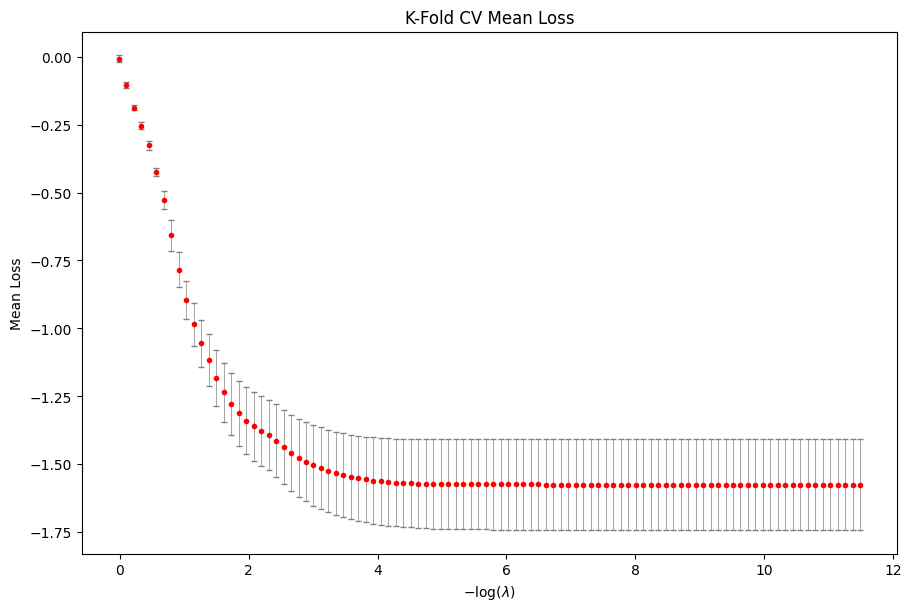

In [21]:
cv_fit.cv_plot()

## Features with zero variance will be removed automatically

If any column of our input data has zero variance, it will be removed by default.

In [22]:
X, y = simulate_binomial_data(n=1000, p=10)

# Make the first column zero variance
X[:, 0] = 1
zero_var_fit = fit_unilasso(X,
                            y,
                            family = 'binomial',
                            lmdas = [0.01, 0.02, 0.1, 0.2], 
                            verbose = True
                            )

100%|          | 0/4 [00:00:00<?, ?it/s]██████████| 4/4 [00:00:00<00:00:00, 5681.14it/s] [dev:19.2%]██████████| 4/4 [00:00:00<00:00:00, 1092.41it/s] [dev:19.2%]


Number of Selected Features: [5 4 1 0]
Regularization path (rounded to 3 decimal places): [0.01 0.02 0.1  0.2 ]


Note that the corresponding coefficient for the first column is 0 across regularization parameters.

In [23]:
print(zero_var_fit.coef[:, 0])

[0. 0. 0. 0.]
